In [58]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import wandb
from wandb.keras import WandbCallback

In [2]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

trainX = trainX.astype("float") / 255.0
testX = testX.astype("float") / 255.0

In [3]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

labelNames = ["airplane", "automobile", "bird", "cat", "deer",
"dog", "frog", "horse", "ship", "truck"]

In [4]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))


In [47]:
Batch_size = 2048
lr = 0.001
epochs = 100

opt = SGD(lr= lr, decay = lr/epochs , momentum= 0.9, nesterov=True)

In [6]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

In [7]:
H_MINI_VGG_3blocks_Without_BN = model.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 127ms/step - loss: 2.3030 - accuracy: 0.1518 - val_loss: 2.1927 - val_accuracy: 0.2250
Epoch 2/100
25/25 [==============================] - 2s 79ms/step - loss: 2.1121 - accuracy: 0.2661 - val_loss: 2.0161 - val_accuracy: 0.2949
Epoch 3/100
25/25 [==============================] - 2s 80ms/step - loss: 1.9479 - accuracy: 0.3183 - val_loss: 1.8902 - val_accuracy: 0.3349
Epoch 4/100
25/25 [==============================] - 2s 78ms/step - loss: 1.8631 - accuracy: 0.3477 - val_loss: 1.8430 - val_accuracy: 0.3482
Epoch 5/100
25/25 [==============================] - 2s 80ms/step - loss: 1.7938 - accuracy: 0.3742 - val_loss: 1.8473 - val_accuracy: 0.3479
Epoch 6/100
25/25 [==============================] - 2s 82ms/step - loss: 1.7244 - accuracy: 0.3959 - val_loss: 1.7280 - val_accuracy: 0.3926
Epoch 7/100
25/25 [==============================] - 2s 79ms/step - loss: 1.6858 - accuracy: 0.4070 - val_loss: 1.7436 - val_accuracy: 0.3843
Epoch

25/25 [==============================] - 2s 79ms/step - loss: 1.0323 - accuracy: 0.6414 - val_loss: 1.1910 - val_accuracy: 0.5768
Epoch 59/100
25/25 [==============================] - 2s 79ms/step - loss: 1.0261 - accuracy: 0.6441 - val_loss: 1.1900 - val_accuracy: 0.5762
Epoch 60/100
25/25 [==============================] - 2s 81ms/step - loss: 1.0305 - accuracy: 0.6429 - val_loss: 1.1317 - val_accuracy: 0.6076
Epoch 61/100
25/25 [==============================] - 2s 79ms/step - loss: 1.0188 - accuracy: 0.6455 - val_loss: 1.0922 - val_accuracy: 0.6191
Epoch 62/100
25/25 [==============================] - 2s 80ms/step - loss: 1.0157 - accuracy: 0.6498 - val_loss: 1.0976 - val_accuracy: 0.6108
Epoch 63/100
25/25 [==============================] - 2s 81ms/step - loss: 1.0135 - accuracy: 0.6471 - val_loss: 1.0969 - val_accuracy: 0.6148
Epoch 64/100
25/25 [==============================] - 2s 81ms/step - loss: 1.0045 - accuracy: 0.6526 - val_loss: 1.0705 - val_accuracy: 0.6261
Epoch 65/100

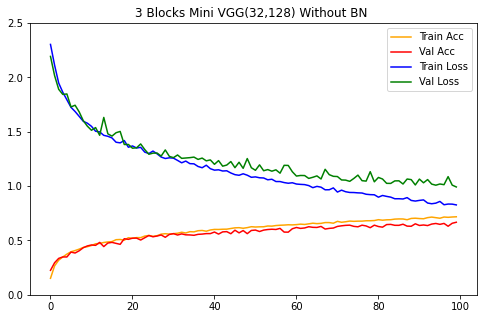

In [9]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_3blocks_Without_BN.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_3blocks_Without_BN.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_3blocks_Without_BN.history['loss'],'b')
plt.plot(H_MINI_VGG_3blocks_Without_BN.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("3 Blocks Mini VGG(32,128) Without BN ")
plt.savefig("3 Blocks Mini VGG(32,128) Without BN", dpi=300,  bbox_inches='tight')
plt.show()

In [10]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax'))

In [11]:
model1.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
H_MINI_VGG_4blocks_Without_BN = model1.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 115ms/step - loss: 2.2576 - accuracy: 0.1846 - val_loss: 2.1026 - val_accuracy: 0.2616
Epoch 2/100
25/25 [==============================] - 2s 90ms/step - loss: 2.0050 - accuracy: 0.2926 - val_loss: 1.9556 - val_accuracy: 0.3163
Epoch 3/100
25/25 [==============================] - 2s 88ms/step - loss: 1.9330 - accuracy: 0.3281 - val_loss: 1.8238 - val_accuracy: 0.3674
Epoch 4/100
25/25 [==============================] - 2s 89ms/step - loss: 1.8298 - accuracy: 0.3635 - val_loss: 1.7473 - val_accuracy: 0.3914
Epoch 5/100
25/25 [==============================] - 2s 88ms/step - loss: 1.7672 - accuracy: 0.3814 - val_loss: 1.6904 - val_accuracy: 0.4093
Epoch 6/100
25/25 [==============================] - 2s 88ms/step - loss: 1.7129 - accuracy: 0.3964 - val_loss: 1.6450 - val_accuracy: 0.4237
Epoch 7/100
25/25 [==============================] - 2s 88ms/step - loss: 1.7018 - accuracy: 0.4015 - val_loss: 1.6118 - val_accuracy: 0.4311
Epoch

25/25 [==============================] - 2s 89ms/step - loss: 1.0181 - accuracy: 0.6498 - val_loss: 1.1329 - val_accuracy: 0.6053
Epoch 59/100
25/25 [==============================] - 2s 88ms/step - loss: 0.9845 - accuracy: 0.6602 - val_loss: 1.1446 - val_accuracy: 0.6003
Epoch 60/100
25/25 [==============================] - 2s 88ms/step - loss: 0.9806 - accuracy: 0.6591 - val_loss: 1.1619 - val_accuracy: 0.5951
Epoch 61/100
25/25 [==============================] - 2s 88ms/step - loss: 0.9785 - accuracy: 0.6597 - val_loss: 1.1440 - val_accuracy: 0.6037
Epoch 62/100
25/25 [==============================] - 2s 89ms/step - loss: 0.9694 - accuracy: 0.6623 - val_loss: 1.0951 - val_accuracy: 0.6205
Epoch 63/100
25/25 [==============================] - 2s 90ms/step - loss: 0.9697 - accuracy: 0.6636 - val_loss: 1.1325 - val_accuracy: 0.6024
Epoch 64/100
25/25 [==============================] - 2s 90ms/step - loss: 0.9496 - accuracy: 0.6689 - val_loss: 1.1627 - val_accuracy: 0.5947
Epoch 65/100

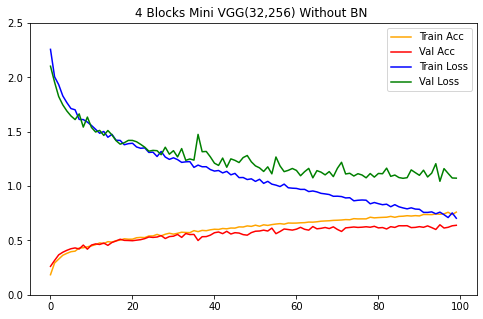

In [12]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_4blocks_Without_BN.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_4blocks_Without_BN.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_4blocks_Without_BN.history['loss'],'b')
plt.plot(H_MINI_VGG_4blocks_Without_BN.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("4 Blocks Mini VGG(32,256) Without BN ")
plt.savefig("4 Blocks Mini VGG(32,256) Without BN", dpi=300,  bbox_inches='tight')
plt.show()

In [13]:

model2 = Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Flatten())
model2.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model2.add(BatchNormalization())
model2.add(Dense(10, activation='softmax'))

In [14]:
model2.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

In [15]:
H_MINI_VGG_3blocks_With_BN = model2.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 136ms/step - loss: 2.6073 - accuracy: 0.1835 - val_loss: 2.2907 - val_accuracy: 0.1373
Epoch 2/100
25/25 [==============================] - 2s 94ms/step - loss: 1.9561 - accuracy: 0.3423 - val_loss: 2.2574 - val_accuracy: 0.1723
Epoch 3/100
25/25 [==============================] - 2s 92ms/step - loss: 1.7279 - accuracy: 0.4069 - val_loss: 2.2739 - val_accuracy: 0.1761
Epoch 4/100
25/25 [==============================] - 2s 92ms/step - loss: 1.5925 - accuracy: 0.4490 - val_loss: 2.2791 - val_accuracy: 0.1868
Epoch 5/100
25/25 [==============================] - 2s 93ms/step - loss: 1.4972 - accuracy: 0.4811 - val_loss: 2.2732 - val_accuracy: 0.2017
Epoch 6/100
25/25 [==============================] - 2s 92ms/step - loss: 1.4239 - accuracy: 0.5061 - val_loss: 2.2365 - val_accuracy: 0.2176
Epoch 7/100
25/25 [==============================] - 2s 92ms/step - loss: 1.3644 - accuracy: 0.5254 - val_loss: 2.1982 - val_accuracy: 0.2374
Epoch

25/25 [==============================] - 2s 90ms/step - loss: 0.5403 - accuracy: 0.8422 - val_loss: 1.1643 - val_accuracy: 0.6023
Epoch 59/100
25/25 [==============================] - 2s 90ms/step - loss: 0.5319 - accuracy: 0.8456 - val_loss: 1.1641 - val_accuracy: 0.6026
Epoch 60/100
25/25 [==============================] - 2s 90ms/step - loss: 0.5229 - accuracy: 0.8506 - val_loss: 1.1647 - val_accuracy: 0.6060
Epoch 61/100
25/25 [==============================] - 2s 91ms/step - loss: 0.5150 - accuracy: 0.8532 - val_loss: 1.1633 - val_accuracy: 0.6056
Epoch 62/100
25/25 [==============================] - 2s 88ms/step - loss: 0.5073 - accuracy: 0.8559 - val_loss: 1.1669 - val_accuracy: 0.6064
Epoch 63/100
25/25 [==============================] - 2s 94ms/step - loss: 0.4990 - accuracy: 0.8603 - val_loss: 1.1686 - val_accuracy: 0.6028
Epoch 64/100
25/25 [==============================] - 2s 91ms/step - loss: 0.4917 - accuracy: 0.8635 - val_loss: 1.1659 - val_accuracy: 0.6058
Epoch 65/100

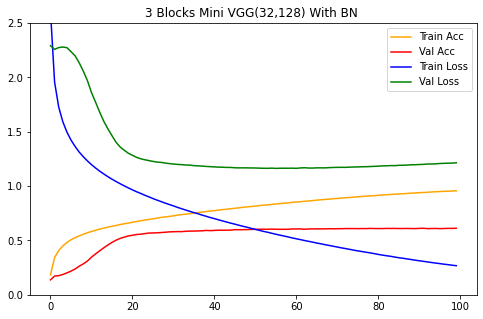

In [16]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_3blocks_With_BN.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_3blocks_With_BN.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_3blocks_With_BN.history['loss'],'b')
plt.plot(H_MINI_VGG_3blocks_With_BN.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("3 Blocks Mini VGG(32,128) With BN ")
plt.savefig("3 Blocks Mini VGG(32,128) With BN", dpi=300,  bbox_inches='tight')
plt.show()

In [48]:
model3 = Sequential()
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3.add(BatchNormalization())
model3.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2, 2)))
model3.add(Flatten())
model3.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model3.add(BatchNormalization())
model3.add(Dense(10, activation='softmax'))

In [49]:
# Batch_size = 2048
# lr = 0.001
# epochs = 100

# opt = SGD(lr= lr, decay = lr/epochs , momentum= 0.9, nesterov=True)

In [50]:
model3.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
H_MINI_VGG_4blocks_With_BN = model3.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 108ms/step - loss: 2.4694 - accuracy: 0.2160 - val_loss: 2.2858 - val_accuracy: 0.1149
Epoch 2/100
25/25 [==============================] - 3s 101ms/step - loss: 1.9147 - accuracy: 0.3549 - val_loss: 2.2493 - val_accuracy: 0.1484
Epoch 3/100
25/25 [==============================] - 3s 100ms/step - loss: 1.6760 - accuracy: 0.4188 - val_loss: 2.2433 - val_accuracy: 0.1776
Epoch 4/100
25/25 [==============================] - 3s 102ms/step - loss: 1.5241 - accuracy: 0.4687 - val_loss: 2.2812 - val_accuracy: 0.1793
Epoch 5/100
25/25 [==============================] - 3s 102ms/step - loss: 1.4134 - accuracy: 0.5057 - val_loss: 2.3188 - val_accuracy: 0.1959
Epoch 6/100
25/25 [==============================] - 3s 102ms/step - loss: 1.3273 - accuracy: 0.5358 - val_loss: 2.3345 - val_accuracy: 0.2084
Epoch 7/100
25/25 [==============================] - 3s 103ms/step - loss: 1.2537 - accuracy: 0.5639 - val_loss: 2.3309 - val_accuracy: 0.2185

Epoch 58/100
25/25 [==============================] - 3s 101ms/step - loss: 0.1725 - accuracy: 0.9915 - val_loss: 1.5321 - val_accuracy: 0.5308
Epoch 59/100
25/25 [==============================] - 3s 101ms/step - loss: 0.1669 - accuracy: 0.9926 - val_loss: 1.5362 - val_accuracy: 0.5287
Epoch 60/100
25/25 [==============================] - 3s 100ms/step - loss: 0.1599 - accuracy: 0.9936 - val_loss: 1.5407 - val_accuracy: 0.5297
Epoch 61/100
25/25 [==============================] - 3s 100ms/step - loss: 0.1536 - accuracy: 0.9946 - val_loss: 1.5457 - val_accuracy: 0.5310
Epoch 62/100
25/25 [==============================] - 3s 105ms/step - loss: 0.1488 - accuracy: 0.9948 - val_loss: 1.5477 - val_accuracy: 0.5310
Epoch 63/100
25/25 [==============================] - 3s 108ms/step - loss: 0.1427 - accuracy: 0.9956 - val_loss: 1.5525 - val_accuracy: 0.5307
Epoch 64/100
25/25 [==============================] - 3s 104ms/step - loss: 0.1413 - accuracy: 0.9959 - val_loss: 1.5557 - val_accuracy:

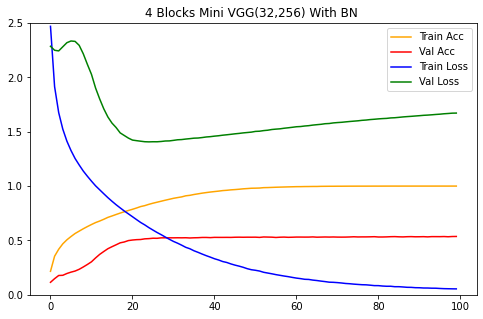

In [51]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_4blocks_With_BN.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_4blocks_With_BN.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_4blocks_With_BN.history['loss'],'b')
plt.plot(H_MINI_VGG_4blocks_With_BN.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("4 Blocks Mini VGG(32,256) With BN ")
plt.savefig("4 Blocks Mini VGG(32,256) With BN", dpi=300,  bbox_inches='tight')
plt.show()

In [52]:
model4 = Sequential()
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model4.add(BatchNormalization())
model4.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D((2, 2)))
model4.add(Flatten())
model4.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model4.add(BatchNormalization())
model4.add(Dense(10, activation='softmax'))

In [53]:
Batch_size = 2048
lr = 0.0001
epochs = 100

opt = SGD(lr= lr, decay = lr/epochs , momentum= 0.9, nesterov=True)

In [54]:
model4.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
H_MINI_VGG_4blocks_With_BN_dfLR = model4.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 106ms/step - loss: 3.0615 - accuracy: 0.1042 - val_loss: 2.3364 - val_accuracy: 0.0927
Epoch 2/100
25/25 [==============================] - 3s 102ms/step - loss: 2.7242 - accuracy: 0.1497 - val_loss: 2.4177 - val_accuracy: 0.1001
Epoch 3/100
25/25 [==============================] - 3s 102ms/step - loss: 2.5148 - accuracy: 0.1891 - val_loss: 2.4843 - val_accuracy: 0.1007
Epoch 4/100
25/25 [==============================] - 3s 103ms/step - loss: 2.3787 - accuracy: 0.2215 - val_loss: 2.5346 - val_accuracy: 0.1047
Epoch 5/100
25/25 [==============================] - 3s 102ms/step - loss: 2.2772 - accuracy: 0.2452 - val_loss: 2.5566 - val_accuracy: 0.1107
Epoch 6/100
25/25 [==============================] - 3s 103ms/step - loss: 2.1963 - accuracy: 0.2657 - val_loss: 2.5465 - val_accuracy: 0.1231
Epoch 7/100
25/25 [==============================] - 3s 105ms/step - loss: 2.1282 - accuracy: 0.2841 - val_loss: 2.5185 - val_accuracy: 0.1437

Epoch 58/100
25/25 [==============================] - 3s 105ms/step - loss: 1.2289 - accuracy: 0.5725 - val_loss: 1.6496 - val_accuracy: 0.4266
Epoch 59/100
25/25 [==============================] - 3s 105ms/step - loss: 1.2224 - accuracy: 0.5747 - val_loss: 1.6463 - val_accuracy: 0.4274
Epoch 60/100
25/25 [==============================] - 3s 103ms/step - loss: 1.2150 - accuracy: 0.5779 - val_loss: 1.6437 - val_accuracy: 0.4295
Epoch 61/100
25/25 [==============================] - 3s 106ms/step - loss: 1.2078 - accuracy: 0.5814 - val_loss: 1.6407 - val_accuracy: 0.4303
Epoch 62/100
25/25 [==============================] - 3s 104ms/step - loss: 1.2016 - accuracy: 0.5837 - val_loss: 1.6379 - val_accuracy: 0.4325
Epoch 63/100
25/25 [==============================] - 3s 102ms/step - loss: 1.1937 - accuracy: 0.5865 - val_loss: 1.6350 - val_accuracy: 0.4332
Epoch 64/100
25/25 [==============================] - 3s 106ms/step - loss: 1.1871 - accuracy: 0.5888 - val_loss: 1.6324 - val_accuracy:

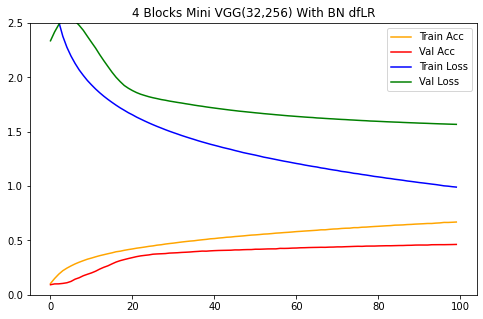

In [55]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_4blocks_With_BN_dfLR.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_4blocks_With_BN_dfLR.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_4blocks_With_BN_dfLR.history['loss'],'b')
plt.plot(H_MINI_VGG_4blocks_With_BN_dfLR.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("4 Blocks Mini VGG(32,256) With BN dfLR")
plt.savefig("4 Blocks Mini VGG(32,256) With BN dfLR", dpi=300,  bbox_inches='tight')
plt.show()

In [65]:
from tensorflow.keras.optimizers import Adam

Batch_size = 2048
lr = 0.001
epochs = 100

#opt = SGD(lr= lr, decay = lr/epochs , momentum= 0.9, nesterov=True)
opt = Adam(lr=lr,amsgrad=True)

In [66]:
model5 = Sequential()
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D((2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(10, activation='softmax'))

In [67]:
model5.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])

H_MINI_VGG_3blocks_With_BN_DropOut = model5.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 100ms/step - loss: 2.3250 - accuracy: 0.3234 - val_loss: 2.3155 - val_accuracy: 0.1689
Epoch 2/100
25/25 [==============================] - 2s 98ms/step - loss: 1.6341 - accuracy: 0.4507 - val_loss: 2.0910 - val_accuracy: 0.2528
Epoch 3/100
25/25 [==============================] - 2s 95ms/step - loss: 1.4027 - accuracy: 0.5122 - val_loss: 2.2850 - val_accuracy: 0.2295
Epoch 4/100
25/25 [==============================] - 2s 95ms/step - loss: 1.2434 - accuracy: 0.5621 - val_loss: 2.1728 - val_accuracy: 0.2820
Epoch 5/100
25/25 [==============================] - 2s 95ms/step - loss: 1.1253 - accuracy: 0.5992 - val_loss: 2.1856 - val_accuracy: 0.2917
Epoch 6/100
25/25 [==============================] - 2s 95ms/step - loss: 1.0416 - accuracy: 0.6294 - val_loss: 2.2613 - val_accuracy: 0.3040
Epoch 7/100
25/25 [==============================] - 2s 97ms/step - loss: 0.9651 - accuracy: 0.6569 - val_loss: 2.0862 - val_accuracy: 0.3435
Epoch

25/25 [==============================] - 2s 95ms/step - loss: 0.1731 - accuracy: 0.9374 - val_loss: 0.5445 - val_accuracy: 0.8387
Epoch 59/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1659 - accuracy: 0.9400 - val_loss: 0.5425 - val_accuracy: 0.8399
Epoch 60/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1665 - accuracy: 0.9421 - val_loss: 0.5574 - val_accuracy: 0.8415
Epoch 61/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1608 - accuracy: 0.9418 - val_loss: 0.5663 - val_accuracy: 0.8394
Epoch 62/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1595 - accuracy: 0.9437 - val_loss: 0.5810 - val_accuracy: 0.8355
Epoch 63/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1600 - accuracy: 0.9437 - val_loss: 0.5606 - val_accuracy: 0.8392
Epoch 64/100
25/25 [==============================] - 2s 95ms/step - loss: 0.1516 - accuracy: 0.9453 - val_loss: 0.6007 - val_accuracy: 0.8354
Epoch 65/100

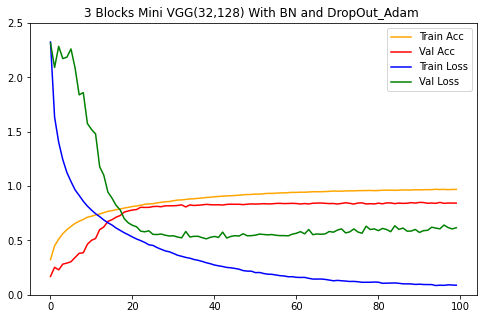

In [68]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_3blocks_With_BN_DropOut.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_3blocks_With_BN_DropOut.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_3blocks_With_BN_DropOut.history['loss'],'b')
plt.plot(H_MINI_VGG_3blocks_With_BN_DropOut.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("3 Blocks Mini VGG(32,128) With BN and DropOut_Adam ")
plt.savefig("3 Blocks Mini VGG(32,128) With BN and DropOut_Adam", dpi=300,  bbox_inches='tight')
plt.show()

In [69]:
model6 = Sequential()
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model6.add(BatchNormalization())
model6.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D((2, 2)))
model6.add(Dropout(0.25))
model6.add(Flatten())
model6.add(Dense(512, activation='relu', kernel_initializer='he_uniform'))
model6.add(BatchNormalization())
model6.add(Dropout(0.5))
model6.add(Dense(10, activation='softmax'))

In [70]:
model6.compile(loss="categorical_crossentropy", optimizer=opt,
metrics=["accuracy"])
H_MINI_VGG_4blocks_With_BN_DropOut = model6.fit(trainX, trainY, validation_data = (testX, testY)
                       , batch_size = Batch_size, epochs= epochs, verbose= 1)

Epoch 1/100
25/25 [==============================] - 3s 112ms/step - loss: 2.1695 - accuracy: 0.3177 - val_loss: 24.6298 - val_accuracy: 0.1263
Epoch 2/100
25/25 [==============================] - 3s 106ms/step - loss: 1.4377 - accuracy: 0.4788 - val_loss: 6.4916 - val_accuracy: 0.1251
Epoch 3/100
25/25 [==============================] - 3s 119ms/step - loss: 1.2446 - accuracy: 0.5591 - val_loss: 5.1695 - val_accuracy: 0.1285
Epoch 4/100
25/25 [==============================] - 3s 106ms/step - loss: 1.1071 - accuracy: 0.6049 - val_loss: 3.7153 - val_accuracy: 0.1658
Epoch 5/100
25/25 [==============================] - 3s 107ms/step - loss: 1.0020 - accuracy: 0.6443 - val_loss: 3.3084 - val_accuracy: 0.1607
Epoch 6/100
25/25 [==============================] - 3s 106ms/step - loss: 0.9255 - accuracy: 0.6713 - val_loss: 3.2738 - val_accuracy: 0.1598
Epoch 7/100
25/25 [==============================] - 3s 106ms/step - loss: 0.8588 - accuracy: 0.6970 - val_loss: 2.9679 - val_accuracy: 0.198

Epoch 58/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0807 - accuracy: 0.9713 - val_loss: 0.7704 - val_accuracy: 0.8341
Epoch 59/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0759 - accuracy: 0.9724 - val_loss: 0.7640 - val_accuracy: 0.8386
Epoch 60/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0768 - accuracy: 0.9735 - val_loss: 0.7514 - val_accuracy: 0.8414
Epoch 61/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0711 - accuracy: 0.9749 - val_loss: 0.7624 - val_accuracy: 0.8398
Epoch 62/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0716 - accuracy: 0.9753 - val_loss: 0.7480 - val_accuracy: 0.8418
Epoch 63/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0661 - accuracy: 0.9765 - val_loss: 0.7798 - val_accuracy: 0.8400
Epoch 64/100
25/25 [==============================] - 3s 106ms/step - loss: 0.0666 - accuracy: 0.9764 - val_loss: 0.7744 - val_accuracy:

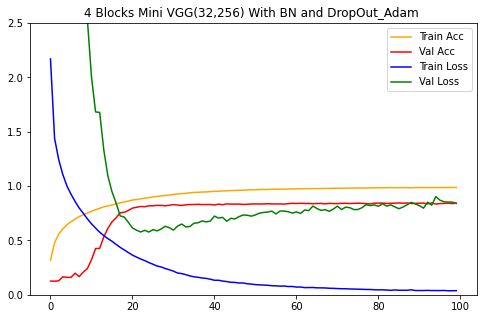

In [71]:
plt.figure(figsize=(8,5))
# plt.plot(np.arange(0,31),history.history['accuracy'], color='orange')
# plt.plot(np.arange(0,31),history.history['loss'],'b')
# plt.plot(np.arange(0,31)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
# plt.plot(np.arange(0,31)+0.5,history.history['val_loss'],'g')
plt.plot(H_MINI_VGG_4blocks_With_BN_DropOut.history['accuracy'],color='orange')
plt.plot(H_MINI_VGG_4blocks_With_BN_DropOut.history['val_accuracy'],'r')
plt.plot(H_MINI_VGG_4blocks_With_BN_DropOut.history['loss'],'b')
plt.plot(H_MINI_VGG_4blocks_With_BN_DropOut.history['val_loss'],'g')
plt.legend(['Train Acc','Val Acc','Train Loss','Val Loss'])
#plt.grid()
plt.gca().set_ylim(0, 2.5) # set the vertical range to [0-1] 
plt.title("4 Blocks Mini VGG(32,256) With BN and DropOut_Adam ")
plt.savefig("4 Blocks Mini VGG(32,256) With BN and DropOut_Adam ", dpi=300,  bbox_inches='tight')
plt.show()